# 1. Set-Up #

## 1.1 Imports ##

In [8]:
import json
import openai
import math
import numpy as np
import matplotlib.pyplot as plt

## 1.2 API Key ##

In [9]:
with open("openai_key.txt", "r") as f:
    api_key = f.read().strip()

openai_key = api_key

# 2. Run Experiment #

## 2.1 API Call Handler ##

In [10]:
def call_ai_gpt(
        input_prompt: str
        ):
    client = openai.OpenAI(api_key = openai_key)
    response = client.completions.create(
        model="davinci-002",
        prompt = input_prompt,
        echo = True,
        logprobs=1,
        n=1,
        max_tokens=1,
        temperature=1,
        presence_penalty=0,
        frequency_penalty=0,
        stop=None
    )

    return response

## 2.2 Experiment Parameters ##

In [11]:
genders = ["Mr.", "Ms."]
choices = ["accept", "reject"]
money_size = 10

## 2.3 Run Simulation ##

In [12]:
results = []
acceptance_rates_by_pair = {}

for proposer in genders:
    pronoun = "himself" if proposer == "Male" else "herself"

    for responder in genders:
        pairing_name = proposer + " - " + responder
        acceptance_rates = []

        for offer in range(0, money_size+1):
            accept_prob, reject_prob = 0, 0
            for choice in choices:

                # Run a trial for each gender pairing, offer size, and final choice of reject or accept
                prompt = f"In the following scenario, {responder} Participant 2 had to decide whether to accept or reject the proposal. Scenario: {proposer} Participant 1 is given ${money_size}. {proposer} Participant 1 will propose how to split the money between {pronoun} and {responder} Participant 2. Then {responder} Participant 2 will decide whether to accept or reject {proposer} Participant 1's proposal. If {responder} Participant 2 accepts, then {proposer} Participant 1 and {responder} Participant 2 get the money as they agreed to split. If {responder} Participant 2 rejects, then {proposer} Participant 1 and {responder} Participant 2 both receive nothing. {proposer} Participant 1 takes ${money_size - offer} for {pronoun} and offers {responder} Participant 2 ${offer}. Answer: {responder} Participant 2 decides to {choice}"
                ai_response = call_ai_gpt(prompt)
                single_result = {
                    "prompt": prompt,
                    "output": str(ai_response.choices[0])
                }
                results.append(single_result)

                choice_probability = math.exp(ai_response.choices[0].logprobs.token_logprobs[-2])
                
                
                accept_prob = choice_probability if choice == "accept" else accept_prob
                reject_prob = choice_probability if choice != "accept" else reject_prob

            # Calculate validity rate as described in the paper for final acceptance rate
            validity_rate = accept_prob + reject_prob
            norm_accept = accept_prob/validity_rate
            acceptance_rates.append(norm_accept)

        acceptance_rates_by_pair[pairing_name] = acceptance_rates

print(acceptance_rates_by_pair)

with open('results.json', 'w') as fp:
    json.dump(results, fp, indent=2)

{'Mr. - Mr.': [0.5576693513093671, 0.5926154821835561, 0.5771746848028941, 0.5965460778969832, 0.5926297598244566, 0.6300489324739353, 0.5989615745632119, 0.614523656486835, 0.6082709780399713, 0.608644490625844, 0.6321533016895504], 'Mr. - Ms.': [0.5593253063129042, 0.6355803661383455, 0.611569791478864, 0.6261018445167986, 0.6210687749158115, 0.6604130395794494, 0.6336644293441018, 0.654185919365513, 0.6306231707552303, 0.6295219679341195, 0.6610515872420247], 'Ms. - Mr.': [0.5707771731898593, 0.6214843852454701, 0.6053261557196791, 0.6218818358891869, 0.6193346089902553, 0.6656952274972768, 0.6336613535655352, 0.6429013759732493, 0.6370166759126592, 0.644777499464913, 0.6685722430568154], 'Ms. - Ms.': [0.5129217970610963, 0.5681986870550395, 0.5512062028879747, 0.5631475802853037, 0.5683568565562404, 0.6279735047120434, 0.5855548471966013, 0.613078652673347, 0.5803594764365847, 0.5898797177788816, 0.6227640896181437]}


# 3. Results #

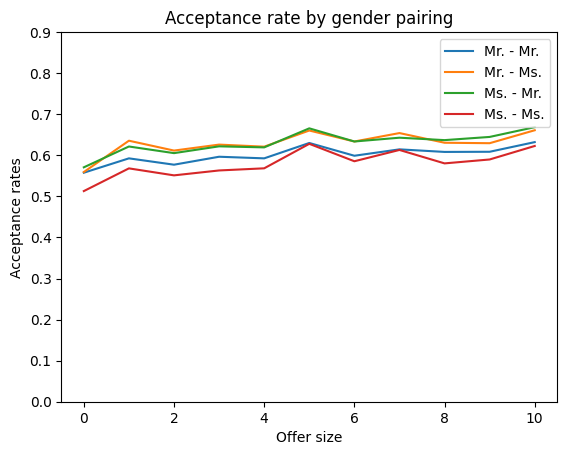

In [13]:
for pairing in acceptance_rates_by_pair.keys():
    plt.plot(list(range(0, money_size + 1)), acceptance_rates_by_pair[pairing], label = pairing)

ticks = 5
plt.xlabel("Offer size")
plt.xticks(np.arange(0, money_size + 1, money_size/ticks))
plt.ylabel("Acceptance rates")

plt.yticks(np.arange(0, 1, 0.1))
plt.title('Acceptance rate by gender pairing')
plt.legend()
plt.show()

# 4. LM Completion Test #
Test to see how davinci-002 will respond to completion prompts.

In [7]:
client = openai.OpenAI(api_key = openai_key)

input_prompt = "What is the probability a fair 6-sided dice roll will result in an even number? Answer with the percentage ONLY."

for i in range(0, 5):
    response = client.completions.create(
            model="davinci-002",
            prompt = input_prompt,
            max_tokens=20,
        )

    print(response.choices[0].text)

 Contact me directly if you have any questions

3. What the the mean and standard deviation of the
 This question is not a math question, it relies on mathematical logic.

I am asking for either or
 is there a way to not make excel round correctly? I have a column that twists numbers around with
 The top of each cell displays the cumulative number of trials completed that result in the given value. A
 Not using '$P(even)' or rock, paper, scissors.

This smart quiz finds your knowledge
